# 1. Introduction

## Simple CNN model for MNIST Dataset

In order to compare the MNIST dataset with Sports dataset, I trained same simple CNN model for both datasets.

In [61]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=np.reshape(X_train,(-1,28,28,1))
X_test=np.reshape(X_test,(-1,28,28,1))

X_train=X_train/255.
X_test=X_test/255.

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [37]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

mnist_model=Sequential()
mnist_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
mnist_model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.3))
mnist_model.add(Flatten())
mnist_model.add(Dense(64,activation='relu'))
mnist_model.add(Dropout(0.4))
mnist_model.add(Dense(10,activation='softmax'))

mnist_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 32)       

In [38]:
mnist_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
result=mnist_model.fit(X_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
   5/1688 [..............................] - ETA: 24s - loss: 2.3237 - acc: 0.0750 

2021-12-03 19:57:38.894736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - ETA: 0s - loss: 0.3283 - acc: 0.8963

2021-12-03 19:57:55.249783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1688/1688 [==============================] - 17s 10ms/step - loss: 0.3283 - acc: 0.8963 - val_loss: 0.0481 - val_acc: 0.9852
Epoch 2/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.1222 - acc: 0.9631 - val_loss: 0.0354 - val_acc: 0.9898
Epoch 3/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0936 - acc: 0.9727 - val_loss: 0.0336 - val_acc: 0.9897
Epoch 4/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0800 - acc: 0.9762 - val_loss: 0.0307 - val_acc: 0.9913
Epoch 5/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0740 - acc: 0.9785 - val_loss: 0.0303 - val_acc: 0.9915
Epoch 6/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0670 - acc: 0.9799 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 7/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0618 - acc: 0.9826 - val_loss: 0.0243 - val_acc: 0.9935
Epoch 8/10
1688/1688 [==============================] - 18s

In [39]:
mnist_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0188 - acc: 0.9937


[0.018845010548830032, 0.9937000274658203]

Test accuracy for this simple CNN model with MNIST dataset is almost 100%!

## Simple CNN model for Sports Dataset

In [34]:
import pandas as pd
import tensorflow as tf
from skimage import io 
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.metrics import categorical_crossentropy

In [35]:
train_dir='/Users/shin1/Desktop/뇌및머신러닝/team_project/archive/train'
test_dir='/Users/shin1/Desktop/뇌및머신러닝/team_project/archive/test'
validation_dir='/Users/shin1/Desktop/뇌및머신러닝/team_project/archive/valid'

In [36]:
from pathlib import Path
train_path = Path(train_dir)
train_path.glob(r'**/*.jpg')

valid_path = Path(validation_dir)
valid_path.glob(r'**/*.jpg')

test_path = Path(test_dir)
test_path.glob(r'**/*.jpg')

<generator object Path.glob at 0x28b989c80>

In [37]:
train_filepath = list(train_path.glob(r'**/*.jpg'))
valid_filepath = list(valid_path.glob(r'**/*.jpg'))
test_filepath = list(test_path.glob(r'**/*.jpg'))

In [38]:
classes_train = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath))
classes_valid = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath))
classes_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],test_filepath))

In [39]:
train_df = pd.concat([pd.Series(train_filepath).astype(str), pd.Series(classes_train)], axis=1)
train_df.columns = ['Images', 'Image_label']

test_df = pd.concat([pd.Series(test_filepath).astype(str), pd.Series(classes_test)], axis=1)
test_df.columns = ['Images', 'Image_label']

valid_df = pd.concat([pd.Series(valid_filepath).astype(str), pd.Series(classes_valid)], axis=1)
valid_df.columns = ['Images', 'Image_label']

In [40]:
train_df

,Images,Image_label
0,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,lacrosse
1,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,lacrosse
2,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,lacrosse
3,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,lacrosse
4,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,lacrosse
...,...,...
10411,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,speed skating
10412,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,speed skating
10413,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,speed skating
10414,/Users/shin1/Desktop/뇌및머신러닝/team_project/archi...,speed skating


In [33]:
print('Train data: {} images'.format(train_df.shape[0]))
print('Validation data: {} images'.format(valid_df.shape[0]))
print('Test data: {} images'.format(test_df.shape[0]))

Train data: 10416 images
Validation data: 365 images
Test data: 365 images


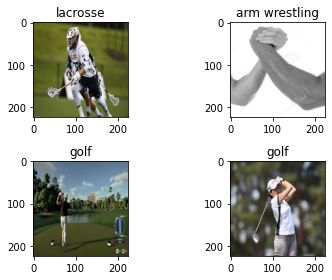

In [25]:
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(io.imread(train_df.loc[i*100]['Images']))
    plt.title(train_df.loc[i*100]['Image_label'])
plt.tight_layout()
plt.show()

In [68]:
X_train=[]
y_train=[]
img_label=0
old_label='lacrosse'
except_idx=[]

for i in range(train_df.shape[0]):
    try:
        image=io.imread(train_df.loc[i]['Images'])
        if (image.shape==(224,224,3)):
            X_train.append(image)
            
            label=train_df.loc[i]['Image_label']
            if label==old_label:
                y_train.append(img_label)
            else:
                img_label+=1
                y_train.append(img_label)
            old_label=train_df.loc[i]['Image_label']
        else:
            except_idx.append(i)
    except:
        continue

For train set, if shape of the image is (224,224,3), append the image to X_train and image label to y_train. 

If shape of the image is not (224,224,3), append the image except_idx to discard it.

In [69]:
print(except_idx)

[1663, 1667, 1709, 1765, 1956, 7816, 7822, 8537, 9360]


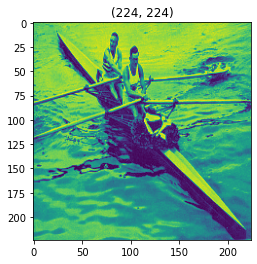

In [70]:
plt.imshow(io.imread(train_df.loc[1663]['Images']))
plt.title(io.imread(train_df.loc[1663]['Images']).shape)
plt.show()

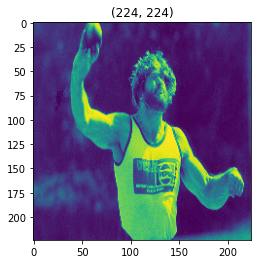

In [71]:
plt.imshow(io.imread(train_df.loc[1956]['Images']))
plt.title(io.imread(train_df.loc[1956]['Images']).shape)
plt.show()

This image has only one channel and other images in except_idx have some problems to use in train stage. So, I will discard it.

In [72]:
train_df = train_df.drop(except_idx)

In [73]:
X_train = np.array(X_train)
X_train = X_train.astype('float32')/255.
print(X_train.shape)

(10407, 224, 224, 3)


Normalize X_train. The shape of X_train is (10407, 224, 224, 3) since 9 images were discarded.

In [74]:
print(len(np.unique(y_train)))

73


y_train has 73 classes to classify.

In [75]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train)
print(y_train.shape)

(10407, 73)


To use in train stage, transfer y_train to one hot encoding.

In [76]:
X_val=[]
y_val=[]
img_label=0
old_label='lacrosse'
except_idx=[]

for i in range(valid_df.shape[0]):
    try:
        image=io.imread(valid_df.loc[i]['Images'])
        if (image.shape==(224,224,3)):
            X_val.append(image)
            
            label=valid_df.loc[i]['Image_label']
            if label==old_label:
                y_val.append(img_label)
            else:
                img_label+=1
                y_val.append(img_label)
            old_label=valid_df.loc[i]['Image_label']
        else:
            except_idx.append(i)
    except:
        continue

X_val = np.array(X_val)
X_val = X_val.astype('float32')/255.

y_val=to_categorical(y_val)

valid_df = valid_df.drop(except_idx)

Do the same thing in validation set.

In [77]:
X_test=[]
y_test=[]
img_label=0
old_label='lacrosse'
except_idx=[]

for i in range(test_df.shape[0]):
    try:
        image=io.imread(test_df.loc[i]['Images'])
        if (image.shape==(224,224,3)):
            X_test.append(image)
            
            label=test_df.loc[i]['Image_label']
            if label==old_label:
                y_test.append(img_label)
            else:
                img_label+=1
                y_test.append(img_label)
            old_label=test_df.loc[i]['Image_label']
        else:
            except_idx.append(i)
    except:
        continue

X_test = np.array(X_test)
X_test = X_test.astype('float32')/255.

y_test=to_categorical(y_test)

test_df = test_df.drop(except_idx)

Also in test set.

In [78]:
print('Train data: {} images'.format(train_df.shape[0]))
print('Validation data: {} images'.format(valid_df.shape[0]))
print('Test data: {} images'.format(test_df.shape[0]))

Train data: 10407 images
Validation data: 365 images
Test data: 364 images


Next, I will train the same simple CNN model with above. I changed input_shape and output_shape only.

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

mnist_model=Sequential()
mnist_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(224,224,3),padding='same'))
mnist_model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.3))
mnist_model.add(Flatten())
mnist_model.add(Dense(64,activation='relu'))
mnist_model.add(Dropout(0.4))
mnist_model.add(Dense(73,activation='softmax'))

mnist_model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      4640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)         

2021-12-04 18:56:49.417706: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-04 18:56:49.417974: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
mnist_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
result_mnist=mnist_model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_val,y_val))

2021-12-04 18:56:59.491281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-04 18:56:59.492159: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-12-04 18:56:59.695893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


326/326 [==============================] - ETA: 0s - loss: 4.3129 - acc: 0.0187

2021-12-04 18:58:15.513956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


326/326 [==============================] - 78s 237ms/step - loss: 4.3129 - acc: 0.0187 - val_loss: 4.2519 - val_acc: 0.0301
Epoch 2/20
326/326 [==============================] - 80s 246ms/step - loss: 4.1410 - acc: 0.0302 - val_loss: 3.9768 - val_acc: 0.0438
Epoch 3/20
326/326 [==============================] - 79s 243ms/step - loss: 4.0161 - acc: 0.0409 - val_loss: 3.8391 - val_acc: 0.0575
Epoch 4/20
326/326 [==============================] - 77s 238ms/step - loss: 3.8815 - acc: 0.0503 - val_loss: 3.7133 - val_acc: 0.0795
Epoch 5/20
326/326 [==============================] - 77s 236ms/step - loss: 3.7366 - acc: 0.0643 - val_loss: 3.6293 - val_acc: 0.0904
Epoch 6/20
326/326 [==============================] - 76s 234ms/step - loss: 3.6374 - acc: 0.0768 - val_loss: 3.4746 - val_acc: 0.1205
Epoch 7/20
326/326 [==============================] - 78s 241ms/step - loss: 3.5245 - acc: 0.0893 - val_loss: 3.4449 - val_acc: 0.1288
Epoch 8/20
326/326 [==============================] - 80s 245ms/st

In [22]:
mnist_model.evaluate(X_test, y_test)

12/12 [==============================] - 2s 119ms/step - loss: 3.3038 - acc: 0.1841


[3.3038196563720703, 0.18406593799591064]

/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3828/1114754288.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(accuracy_val,'b', color='r', label='validation acc' )


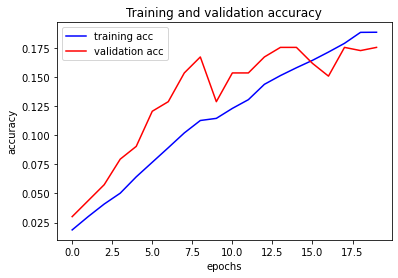

In [23]:
import matplotlib.pyplot as plt

accuracy=result_mnist.history['acc']
accuracy_val=result_mnist.history['val_acc']

plt.clf()
plt.plot(accuracy,'b',label='training acc')
plt.plot(accuracy_val,'b', color='r', label='validation acc' )

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

This simple CNN model has vibration with validation accuracy and not converges to some value when epoch goes on. Also, its accuracy is too low for both validation, and. test set. That means this model is not a good model for this dataset.

# 2. Data preprocessing

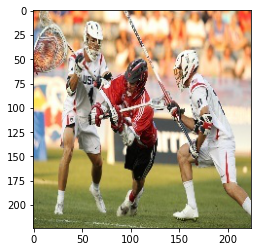

In [56]:
# accessing an image file from the dataset classes
image = io.imread(train_df["Images"][0])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [63]:
## Data augmentation

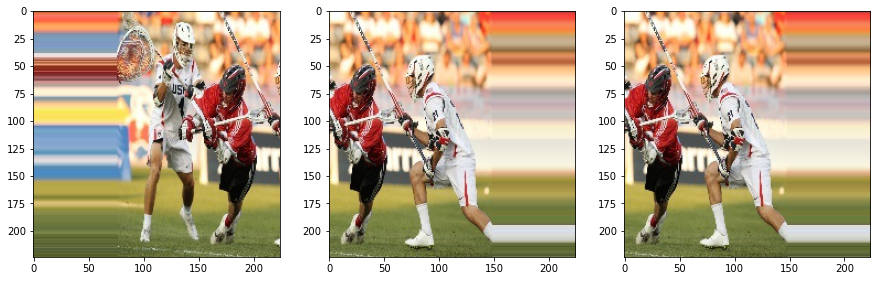

In [64]:
# Shifting
# import libraries

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-75,75])

# create an iterator
it = datagen.flow(samples, btch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    shifted_image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(shifted_image) 

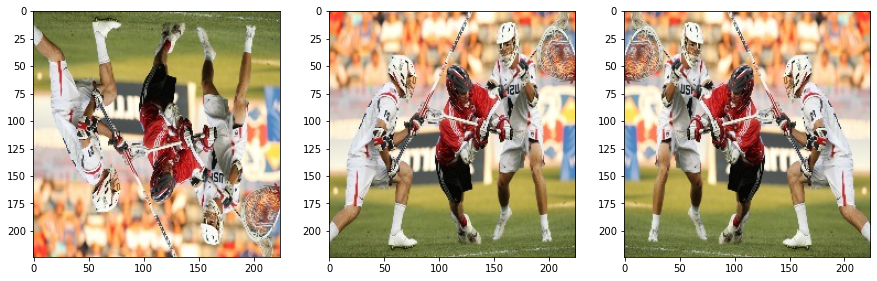

In [65]:
# Flipping
# ImageDataGenerator for flipping
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# expand dimension to one sample
samples = expand_dims(image, 0)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    flipped_image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(flipped_image) 

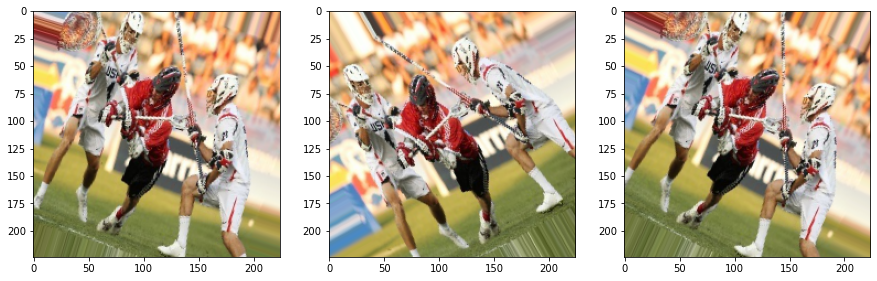

In [67]:
# Rotating
datagen = ImageDataGenerator(rotation_range=30, fill_mode='nearest')
# expand dimension to one sample
samples = expand_dims(image, 0)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    rotated_image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(rotated_image) 

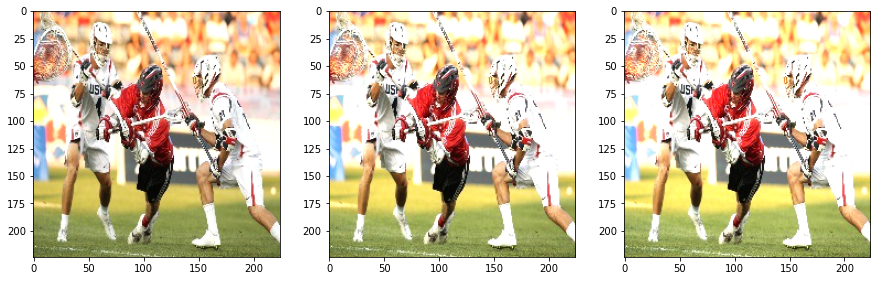

In [92]:
# Change brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
# expand dimension to one sample
samples = expand_dims(image, 0)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    brightened_image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(brightened_image) 

/Users/shin1/miniforge3/envs/tf/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/shin1/miniforge3/envs/tf/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


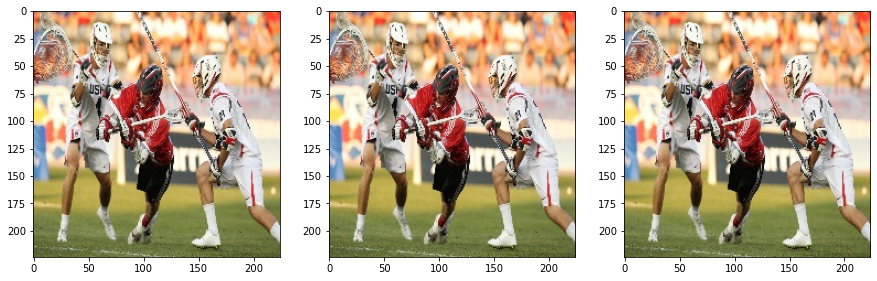

In [93]:
# Standardization
datagen = ImageDataGenerator(featurewise_center =True, featurewise_std_normalization = True)
# expand dimension to one sample
samples = expand_dims(image, 0)
# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    standardized_image = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(standardized_image) 

In [83]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, 
                                   shear_range = 0.2, width_shift_range=0.2, brightness_range=[0.5,2.0],
                                   zoom_range = 0.2, horizontal_flip = True, vertical_flip =True)
test_datagen = ImageDataGenerator(rescale = 1./255.)

In [25]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              x_col = 'Images', y_col ='Image_label',
                                              target_size = (50,50), batch_size = 32, 
                                              class_mode = 'categorical', shuffle = True)
val_gen = test_datagen.flow_from_dataframe(valid_df, 
                                            x_col = 'Images', y_col ='Image_label',
                                            target_size=(50,50), batch_size= 32, 
                                            class_mode='categorical', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            x_col = 'Images', y_col ='Image_label',
                                            target_size=(50,50), batch_size= 32, 
                                            class_mode='categorical', shuffle=False)

Found 10407 validated image filenames belonging to 73 classes.
Found 365 validated image filenames belonging to 73 classes.
Found 364 validated image filenames belonging to 73 classes.


## Simple CNN model with preprocessed sports data

To examine the effects of data preprocessing include data augmentation, the model introduced in the introduction step was equally applied to the dataset after preprocessing. 

In order to reduce the parameters to be estimated, the image size of (224,224,3) was changed to (50,50,3) and the model was fitted.

In [26]:
mnist_model=Sequential()
mnist_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(50,50,3),padding='same'))
mnist_model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(Dropout(0.2))
mnist_model.add(Conv2D(32,(3,3),activation='relu'))
mnist_model.add(MaxPooling2D((2,2), strides=2))
mnist_model.add(Dropout(0.3))
mnist_model.add(Flatten())
mnist_model.add(Dense(64,activation='relu'))
mnist_model.add(Dropout(0.4))
mnist_model.add(Dense(73,activation='softmax'))

mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 23, 23, 32)        4640      
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 32)       

In [27]:
mnist_model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [28]:
result_mnist=mnist_model.fit(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50


2021-12-04 19:28:27.385324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


326/326 [==============================] - ETA: 0s - loss: 4.2897 - acc: 0.0162

2021-12-04 19:28:39.713941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


326/326 [==============================] - 13s 39ms/step - loss: 4.2897 - acc: 0.0162 - val_loss: 4.2903 - val_acc: 0.0082
Epoch 2/50
326/326 [==============================] - 12s 36ms/step - loss: 4.2489 - acc: 0.0213 - val_loss: 4.1228 - val_acc: 0.0329
Epoch 3/50
326/326 [==============================] - 12s 38ms/step - loss: 4.0785 - acc: 0.0313 - val_loss: 4.0223 - val_acc: 0.0329
Epoch 4/50
326/326 [==============================] - 13s 39ms/step - loss: 4.0052 - acc: 0.0399 - val_loss: 3.8892 - val_acc: 0.0521
Epoch 5/50
326/326 [==============================] - 12s 37ms/step - loss: 3.9061 - acc: 0.0472 - val_loss: 3.7402 - val_acc: 0.0685
Epoch 6/50
326/326 [==============================] - 12s 37ms/step - loss: 3.8103 - acc: 0.0523 - val_loss: 3.7186 - val_acc: 0.0767
Epoch 7/50
326/326 [==============================] - 12s 36ms/step - loss: 3.7476 - acc: 0.0657 - val_loss: 3.6005 - val_acc: 0.0877
Epoch 8/50
326/326 [==============================] - 12s 37ms/step - los

In [29]:
mnist_model.evaluate(test_gen)

12/12 [==============================] - 0s 26ms/step - loss: 2.7532 - acc: 0.2610


[2.753187894821167, 0.2609890103340149]

With preprocessing, test accuracy improved with compared to above result.

/var/folders/9r/7f1bw3q15yz7435178lsgb5w0000gp/T/ipykernel_3828/1114754288.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(accuracy_val,'b', color='r', label='validation acc' )


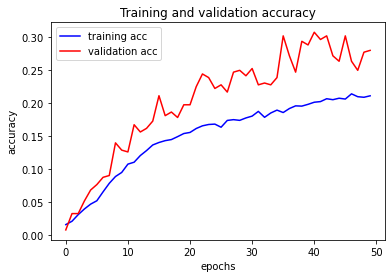

In [30]:
import matplotlib.pyplot as plt

accuracy=result_mnist.history['acc']
accuracy_val=result_mnist.history['val_acc']

plt.clf()
plt.plot(accuracy,'b',label='training acc')
plt.plot(accuracy_val,'b', color='r', label='validation acc' )

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 3. Model

## Transfer learning(MobilenetV2)

In [104]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_df,
                                              x_col = 'Images', y_col ='Image_label',
                                              target_size = (224,224), batch_size = 128, 
                                              class_mode = 'categorical', shuffle = True)
val_gen = test_datagen.flow_from_dataframe(valid_df, 
                                            x_col = 'Images', y_col ='Image_label',
                                            target_size=(224,224), batch_size= 128, 
                                            class_mode='categorical', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(test_df,
                                            x_col = 'Images', y_col ='Image_label',
                                            target_size=(224,224), batch_size= 128, 
                                            class_mode='categorical', shuffle=False)

Found 10407 validated image filenames belonging to 73 classes.
Found 365 validated image filenames belonging to 73 classes.
Found 364 validated image filenames belonging to 73 classes.


In [105]:
from tensorflow.keras.applications import MobileNetV2
mobilenet_base = MobileNetV2(input_shape=(224,224,3),
                             include_top=False,
                             weights='imagenet')
mobilenet_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_25[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [106]:
mobilenet_base.trainable=False

In [107]:
from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

inputs = Input(shape=(224, 224, 3))
x = mobilenet_base(inputs, training=False)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(73, activation='softmax')(x)

mobilenet_model = Model(inputs, outputs)
mobilenet_model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dense_48 (Dense)             (None, 7, 7, 1024)        1311744   
_________________________________________________________________
dropout_48 (Dropout)         (None, 7, 7, 1024)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 7, 7, 1024)        4096      
_________________________________________________________________
global_average_pooling2d_18  (None, 1024)              0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 1024)              0  

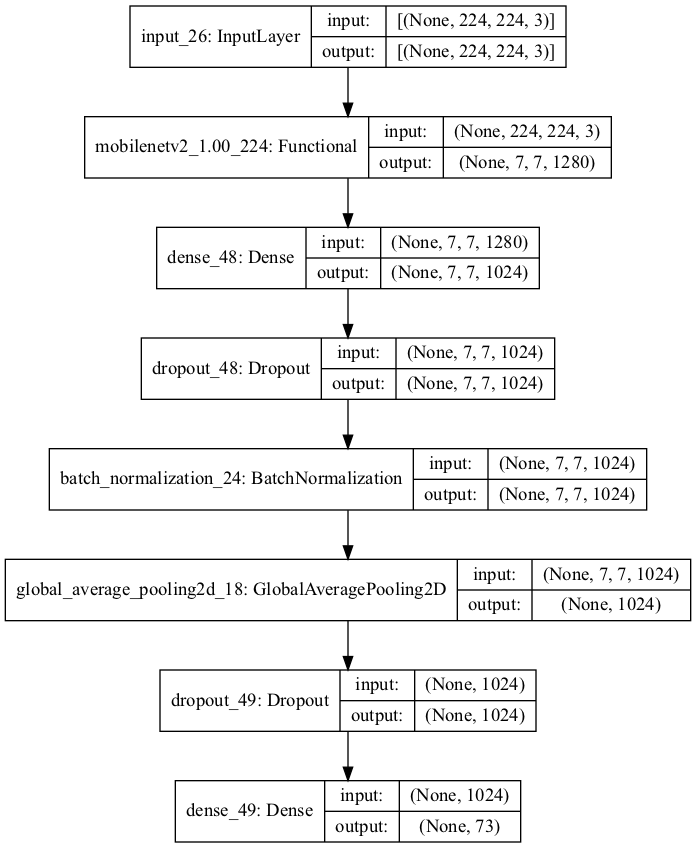

In [108]:
from tensorflow.keras.utils import plot_model
plot_model(mobilenet_model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [110]:
import datetime

log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2021-12-05 02:17:27.762286: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 02:17:27.762320: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-05 02:17:27.763098: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [111]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_cb = ModelCheckpoint("model.h5",save_best_only=True)

In [112]:
mobilenet_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = mobilenet_model.fit(train_gen, epochs=30, callbacks=[checkpoint_cb,tensorboard_callback], validation_data=val_gen)

Epoch 1/30


2021-12-05 02:17:36.682779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/82 [..............................] - ETA: 4:11 - loss: 4.4188 - acc: 0.0156

2021-12-05 02:17:39.214778: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 02:17:39.214801: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


 2/82 [..............................] - ETA: 1:03 - loss: 4.3066 - acc: 0.0469

2021-12-05 02:17:40.061350: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-05 02:17:40.067481: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-05 02:17:40.072286: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/my_board/20211205-021727/train/plugins/profile/2021_12_05_02_17_40
2021-12-05 02:17:40.073760: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/my_board/20211205-021727/train/plugins/profile/2021_12_05_02_17_40/sinbaeglog-ui-MacBookPro.local.trace.json.gz
2021-12-05 02:17:40.079778: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/my_board/20211205-021727/train/plugins/profile/2021_12_05_02_17_40
2021-12-05 02:17:40.080015: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/my_board/2021120

82/82 [==============================] - ETA: 0s - loss: 1.8989 - acc: 0.5397

2021-12-05 02:18:44.271361: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 71s 841ms/step - loss: 1.8989 - acc: 0.5397 - val_loss: 0.8638 - val_acc: 0.7507
Epoch 2/30
82/82 [==============================] - 67s 812ms/step - loss: 0.9466 - acc: 0.7483 - val_loss: 0.7509 - val_acc: 0.8000
Epoch 3/30
82/82 [==============================] - 65s 790ms/step - loss: 0.7719 - acc: 0.7867 - val_loss: 0.6220 - val_acc: 0.8137
Epoch 4/30
82/82 [==============================] - 65s 787ms/step - loss: 0.6633 - acc: 0.8180 - val_loss: 0.5739 - val_acc: 0.8356
Epoch 5/30
82/82 [==============================] - 64s 771ms/step - loss: 0.5912 - acc: 0.8342 - val_loss: 0.5702 - val_acc: 0.8274
Epoch 6/30
82/82 [==============================] - 66s 795ms/step - loss: 0.5264 - acc: 0.8503 - val_loss: 0.4888 - val_acc: 0.8658
Epoch 7/30
82/82 [==============================] - 68s 827ms/step - loss: 0.4748 - acc: 0.8656 - val_loss: 0.4871 - val_acc: 0.8658
Epoch 8/30
82/82 [==============================] - 68s 825ms/step - loss: 0.450

In [113]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [114]:
mobilenet_model.evaluate(test_gen)

3/3 [==============================] - 2s 682ms/step - loss: 0.1792 - acc: 0.9396


[0.17922750115394592, 0.9395604729652405]

Very high performance!

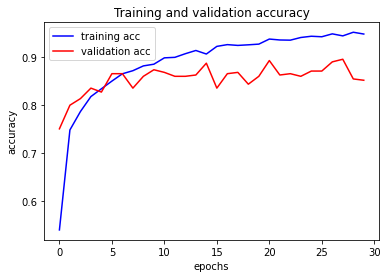

In [115]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']

plt.clf()
plt.plot(acc,'b',label='training acc')
plt.plot(val_acc,'b', color='r', label='validation acc' )

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## ResNet50V2

In [3]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

resnetv2 = ResNet50V2(include_top=False,input_shape=(224,224,3))

for layer in resnetv2.layers:
    layer.trainable = False

inputs = Input(shape=(224, 224, 3))
x = resnetv2(inputs, training=False)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(73, activation='softmax')(x)


resnetv2_model = Model(inputs, outputs)
resnetv2_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
dense (Dense)                (None, 7, 7, 1024)        2098176   
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1024)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 1024)        4096      
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 73)                74825 

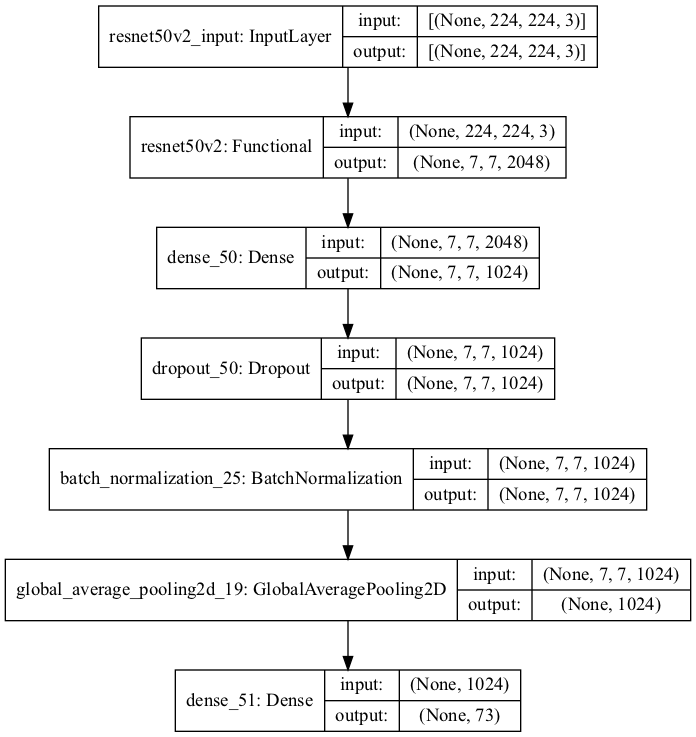

In [117]:
from tensorflow.keras.utils import plot_model
plot_model(resnetv2_model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [118]:
import datetime

log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2021-12-05 02:49:50.796018: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 02:49:50.796028: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-12-05 02:49:50.796659: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


In [119]:
import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("final_model.h5",save_best_only=True)

In [120]:
resnetv2_model.summary()
resnetv2_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = resnetv2_model.fit(train_gen, epochs = 30, validation_data= val_gen, callbacks=[checkpoint_cb,tensorboard_callback])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
dense_50 (Dense)             (None, 7, 7, 1024)        2098176   
_________________________________________________________________
dropout_50 (Dropout)         (None, 7, 7, 1024)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 7, 7, 1024)        4096      
_________________________________________________________________
global_average_pooling2d_19  (None, 1024)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 73)                74825     
Total params: 25,741,897
Trainable params: 2,175,049
Non-trainable params: 23,566,848
__________________________________

2021-12-05 02:49:52.266229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/82 [..............................] - ETA: 3:54 - loss: 4.4247 - accuracy: 0.0078

2021-12-05 02:49:54.533990: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-12-05 02:49:54.534006: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


 2/82 [..............................] - ETA: 1:41 - loss: 4.2909 - accuracy: 0.0430

2021-12-05 02:49:55.869225: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-12-05 02:49:55.874600: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-12-05 02:49:55.878911: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/my_board/20211205-024950/train/plugins/profile/2021_12_05_02_49_55
2021-12-05 02:49:55.880921: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/my_board/20211205-024950/train/plugins/profile/2021_12_05_02_49_55/sinbaeglog-ui-MacBookPro.local.trace.json.gz
2021-12-05 02:49:55.883990: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/my_board/20211205-024950/train/plugins/profile/2021_12_05_02_49_55
2021-12-05 02:49:55.884153: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/my_board/2021120

82/82 [==============================] - ETA: 0s - loss: 1.9040 - accuracy: 0.5453

2021-12-05 02:51:29.473611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 102s 1s/step - loss: 1.9040 - accuracy: 0.5453 - val_loss: 0.9405 - val_accuracy: 0.7151
Epoch 2/30
82/82 [==============================] - 100s 1s/step - loss: 0.9759 - accuracy: 0.7425 - val_loss: 0.7982 - val_accuracy: 0.7808
Epoch 3/30
82/82 [==============================] - 100s 1s/step - loss: 0.7809 - accuracy: 0.7885 - val_loss: 0.6634 - val_accuracy: 0.7918
Epoch 4/30
82/82 [==============================] - 100s 1s/step - loss: 0.6451 - accuracy: 0.8238 - val_loss: 0.5650 - val_accuracy: 0.8274
Epoch 5/30
82/82 [==============================] - 99s 1s/step - loss: 0.5852 - accuracy: 0.8364 - val_loss: 0.6260 - val_accuracy: 0.8055
Epoch 6/30
82/82 [==============================] - 99s 1s/step - loss: 0.5204 - accuracy: 0.8554 - val_loss: 0.6076 - val_accuracy: 0.8110
Epoch 7/30
82/82 [==============================] - 99s 1s/step - loss: 0.4672 - accuracy: 0.8697 - val_loss: 0.6107 - val_accuracy: 0.8082
Epoch 8/30
82/82 [=========

In [121]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


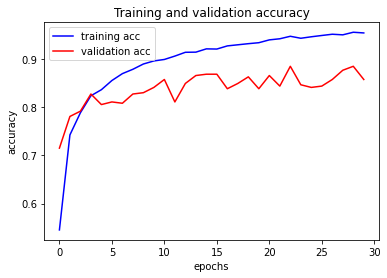

In [124]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.clf()
plt.plot(acc,'b',label='training acc')
plt.plot(val_acc,'b', color='r', label='validation acc' )

plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [123]:
resnetv2_model.evaluate(test_gen)

3/3 [==============================] - 4s 1s/step - loss: 0.1618 - accuracy: 0.9451


[0.16177792847156525, 0.9450549483299255]

--> Final model!